In [2]:
import pandas as pd

df = pd.read_excel('INF2178_A2_data.xlsx')

# Display the first few rows of the dataframe
print(df.head())

# Basic information about the dataset
print(df.info())

# Descriptive statistics for numeric columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   _id  LOC_ID                                           LOC_NAME  \
0    1    1013              Lakeshore Community Child Care Centre   
1    2    1014            Alternative Primary School Parent Group   
2    3    1015     Cardinal Leger Child Care Centre (Scarborough)   
3    4    1016  George Brown - Richmond Adelaide Childcare Centre   
4    5    1017  Woodland Nursery School (Warden Woods Communit...   

             AUSPICE            ADDRESS    PCODE  ward  \
0  Non Profit Agency     101 SEVENTH ST  M8V 3B5     3   
1  Non Profit Agency    1100 SPADINA RD  M5N 2M6     8   
2  Non Profit Agency     600 MORRISH RD  M1C 4Y1    25   
3  Non Profit Agency  130 ADELAIDE ST W  M5H 3P5    10   
4  Non Profit Agency    1 FIRVALLEY CRT  M1L 1N8    20   

                    bldg_type                         BLDGNAME  IGSPACE  \
0    Public Elementary School     Seventh Street Public School        0   
1    Public Elementary School  North Preparatory Public School        0   
2  Catholic

In [11]:
# Frequency distribution for categorical columns
for col in ['AUSPICE', 'bldg_type', 'subsidy']:
    print(df[col].value_counts())


Non Profit Agency                703
Commercial Agency                321
Public (City Operated) Agency     39
Name: AUSPICE, dtype: int64
Public Elementary School            301
Other                               227
Catholic Elementary School          113
Place of Worship                     82
High Rise Apartment                  59
Purpose Built                        51
Community/Recreation Centre          35
House                                33
Commercial Building                  24
Public High School                   23
Office Building                      18
Church                               16
Public Elementary (French)           13
Public (school closed)                8
Catholic Elementary (French)          7
Private Elementary School             7
Low Rise Apartment                    7
Community/Rec Centre - City           7
Synagogue                             7
Community College/University          5
Catholic High School                  4
Industrial Building  

In [4]:
# Dropping the '_id' and 'LOC_ID' columns
summary_stats = df.drop(columns=['_id', 'LOC_ID']).describe()

# Printing the summary statistics
print(summary_stats)


              ward      IGSPACE      TGSPACE      PGSPACE      KGSPACE  \
count  1063.000000  1063.000000  1063.000000  1063.000000  1063.000000   
mean     12.511759     3.896519    11.600188    24.258702    14.257761   
std       7.032050     6.091782    12.088152    18.577416    20.493290   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%       6.000000     0.000000     0.000000    16.000000     0.000000   
50%      12.000000     0.000000    10.000000    24.000000     0.000000   
75%      19.000000    10.000000    15.000000    32.000000    26.000000   
max      25.000000    30.000000    90.000000   144.000000   130.000000   

           SGSPACE     TOTSPACE  
count  1063.000000  1063.000000  
mean     21.661336    75.674506  
std      30.423503    47.816518  
min       0.000000     6.000000  
25%       0.000000    43.000000  
50%       0.000000    62.000000  
75%      30.000000    97.000000  
max     285.000000   402.000000  


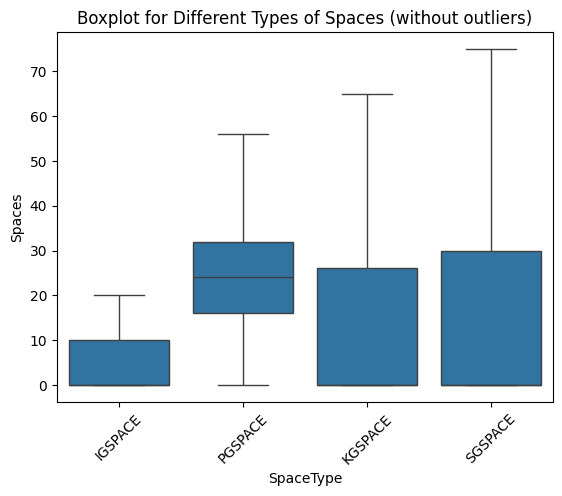

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt


# Create multiple boxplots for different types of spaces without outliers
space_types = ['IGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE']
df_melted = df.melt(value_vars=space_types, var_name='SpaceType', value_name='Spaces')

sns.boxplot(x='SpaceType', y='Spaces', data=df_melted, showfliers=False)
plt.title('Boxplot for Different Types of Spaces (without outliers)')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


In [5]:

# Create an aggregate table
agg_table = df.groupby('bldg_type')['TOTSPACE'].sum().reset_index()

# Sort the table based on 'TOTSPACE' for better visualization
agg_table = agg_table.sort_values('TOTSPACE', ascending=False)

# Print the aggregate table
print(agg_table)

                           bldg_type  TOTSPACE
24          Public Elementary School     31870
19                             Other     14336
1         Catholic Elementary School      7793
20                  Place of Worship      4155
12               High Rise Apartment      3990
28                     Purpose Built      3645
11       Community/Recreation Centre      2284
14                             House      1614
23        Public Elementary (French)      1567
4                Commercial Building      1342
18                   Office Building      1289
26                Public High School      1019
0       Catholic Elementary (French)       880
3                             Church       870
21         Private Elementary School       600
29                         Synagogue       520
22            Public (school closed)       462
16                Low Rise Apartment       401
8        Community/Rec Centre - City       352
5       Community College/University       298
15           

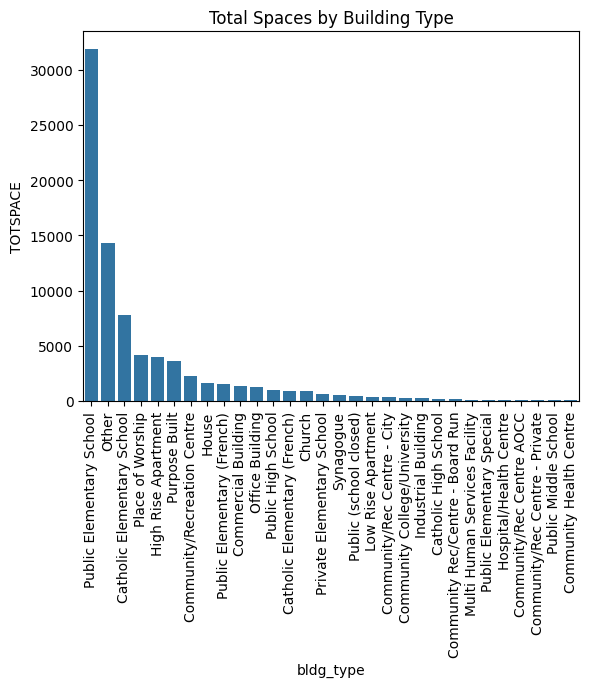

In [6]:
# Now, create a bar plot
sns.barplot(x='bldg_type', y='TOTSPACE', data=agg_table)
plt.title('Total Spaces by Building Type')
plt.xticks(rotation=90)
plt.show()

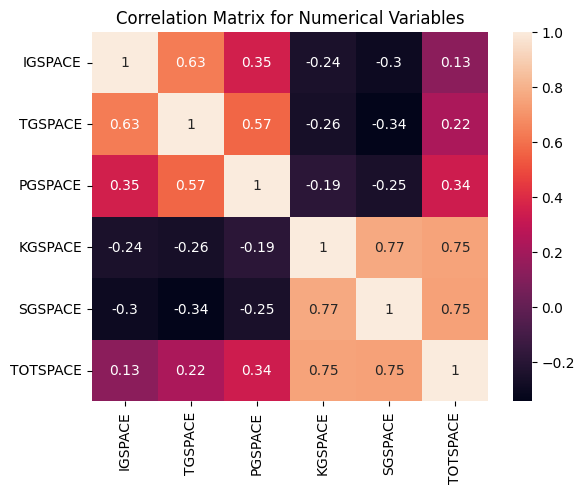

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# Select only the columns you're interested in
selected_columns = df[['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE', 'TOTSPACE']]

# Compute the correlation matrix for the selected columns
correlation_matrix = selected_columns.corr()

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()



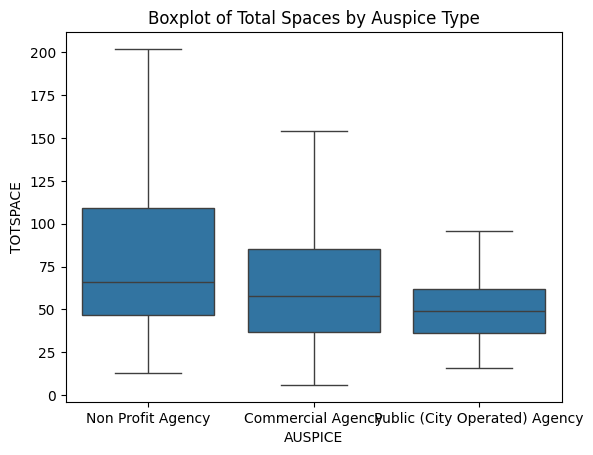

                  sum_sq      df          F        PR(>F)
C(AUSPICE)  9.611211e+04     2.0  21.843051  5.057716e-10
Residual    2.332065e+06  1060.0        NaN           NaN


In [19]:
# Research Question 1:
# Does the auspice type (Non-Profit vs. Commercial) affect the total spaces (TOTSPACE) available in daycare centers in Toronto?

# Group by 'AUSPICE' and describe 'TOTSPACE'
auspice_group = df.groupby('AUSPICE')['TOTSPACE'].describe()
print(auspice_group)

# Boxplot for 'TOTSPACE' by 'AUSPICE' category
sns.boxplot(x='AUSPICE', y='TOTSPACE', data=df,showfliers=False)
plt.title('Boxplot of Total Spaces by Auspice Type')
plt.show()


# One-Way ANOVA
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols



# One-Way ANOVA with 'AUSPICE' as the independent variable and 'TOTSPACE' as the dependent variable.
model_1 = ols('TOTSPACE ~ C(AUSPICE)', data=df).fit()
anova_table_1 = sm.stats.anova_lm(model_1, typ=2)
print(anova_table_1)


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


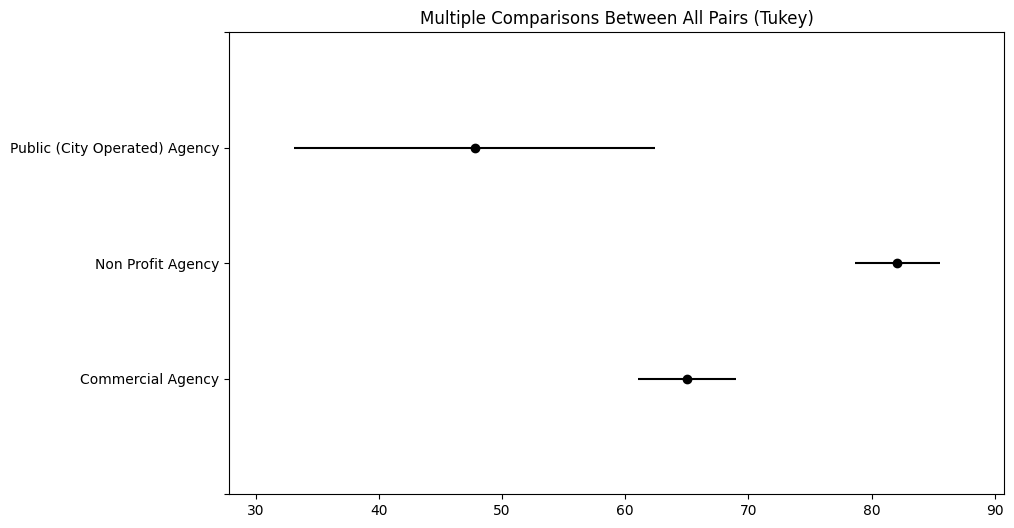

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey's HSD post-hoc test
tukey_hsd = pairwise_tukeyhsd(endog=df['TOTSPACE'],  # Response variable
                              groups=df['AUSPICE'],  # Grouping variable
                              alpha=0.05)            # Significance level

# Print the results
print(tukey_hsd)

# If you want to visualize the results
tukey_hsd.plot_simultaneous()
plt.show()


                                  count        mean        std    min     25%  \
bldg_type                                                                       
Catholic Elementary (French)        7.0  125.714286  23.865696   87.0  115.50   
Catholic Elementary School        113.0   68.964602  35.972690   15.0   43.00   
Catholic High School                4.0   48.500000  15.926916   26.0   43.25   
Church                             16.0   54.375000  30.141610   16.0   38.50   
Commercial Building                24.0   55.916667  33.457197   16.0   26.00   
Community College/University        5.0   59.600000  26.444281   26.0   47.00   
Community Health Centre             1.0   49.000000        NaN   49.0   49.00   
Community Rec/Centre - Board Run    1.0  180.000000        NaN  180.0  180.00   
Community/Rec Centre - City         7.0   50.285714  23.286006   16.0   34.50   
Community/Rec Centre - Private      1.0   67.000000        NaN   67.0   67.00   
Community/Rec Centre AOCC   

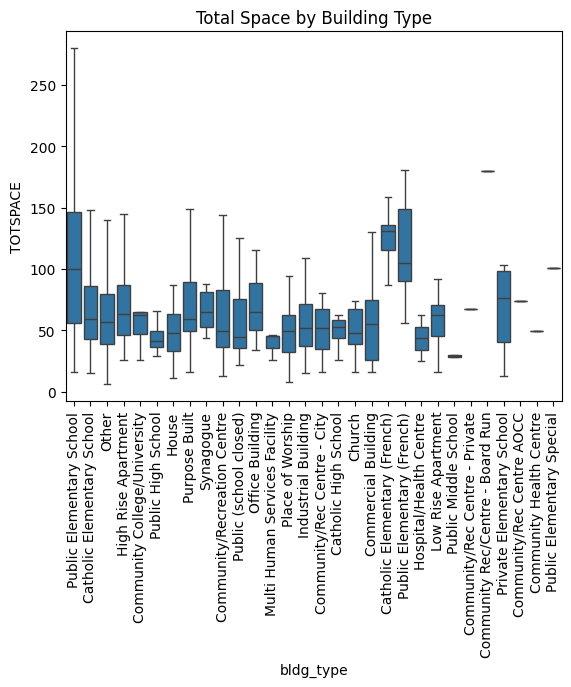

                    sum_sq      df        F        PR(>F)
C(bldg_type)  5.205689e+05    29.0  9.72056  1.715361e-37
Residual      1.907608e+06  1033.0      NaN           NaN


In [22]:
# Research Question 2:
# Is there a significant difference in the total spaces offered (TOTSPACE) among different building types (bldg_type) where daycare centers are located?

# Group by 'bldg_type' and describe 'TOTSPACE'
building_group = df.groupby('bldg_type')['TOTSPACE'].describe()
print(building_group)

# Boxplot for 'TOTSPACE' by 'bldg_type' category
sns.boxplot(x='bldg_type', y='TOTSPACE', data=df, showfliers=False)
plt.title('Total Space by Building Type')
plt.xticks(rotation=90)
plt.show()



# One-Way ANOVA
# One-Way ANOVA with 'bldg_type' as the independent variable and 'TOTSPACE' as the dependent variable.
model_2 = ols('TOTSPACE ~ C(bldg_type)', data=df).fit()
anova_table_2 = sm.stats.anova_lm(model_2, typ=2)
print(anova_table_2)


In [6]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols



# Now, proceed with Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['TOTSPACE'],      # Data
                          groups=df['bldg_type'],    # Groups
                          alpha=0.05)                # Significance level

# Print the results
print(tukey)




                    sum_sq      df        F        PR(>F)
C(bldg_type)  5.205689e+05    29.0  9.72056  1.715361e-37
Residual      1.907608e+06  1033.0      NaN           NaN
                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
             group1                           group2               meandiff p-adj    lower    upper   reject
------------------------------------------------------------------------------------------------------------
    Catholic Elementary (French)       Catholic Elementary School  -56.7497 0.1543 -119.6741   6.1747  False
    Catholic Elementary (French)             Catholic High School  -77.2143 0.4913 -178.4734  24.0448  False
    Catholic Elementary (French)                           Church  -71.3393 0.0685 -144.5495   1.8709  False
    Catholic Elementary (French)              Commercial Building  -69.7976 0.0465  -139.195  -0.4003   True
    Catholic Elementary (French)     Community College/Universi

                                       count       mean        std   min  \
AUSPICE                       subsidy                                      
Commercial Agency             N        243.0  60.465021  36.164595   6.0   
                              Y         78.0  79.064103  34.462605  26.0   
Non Profit Agency             N        102.0  51.901961  34.635445  13.0   
                              Y        601.0  87.229617  52.623986  15.0   
Public (City Operated) Agency Y         39.0  47.769231  17.859778  16.0   

                                         25%   50%     75%    max  
AUSPICE                       subsidy                              
Commercial Agency             N        33.00  54.0   79.00  235.0  
                              Y        52.75  76.0   97.75  229.0  
Non Profit Agency             N        24.00  48.0   65.75  189.0  
                              Y        49.00  71.0  114.00  402.0  
Public (City Operated) Agency Y        36.00  49.0   62.00 

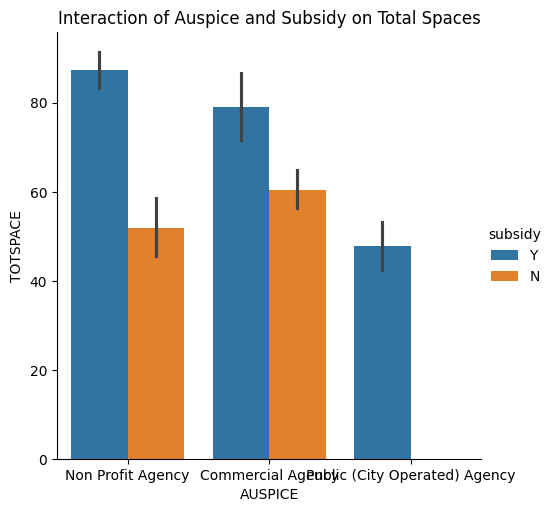

                             sum_sq      df          F        PR(>F)
C(AUSPICE)             8.567996e+03     2.0   2.057586  1.282730e-01
C(subsidy)             8.352744e+04     1.0  40.117876  3.529094e-10
C(AUSPICE):C(subsidy)  5.603445e+04     2.0  13.456555  1.694282e-06
Residual               2.202809e+06  1058.0        NaN           NaN


In [24]:
# Research Question 3:
# Is there an interaction effect between the auspice type (AUSPICE) and the presence of a subsidy (subsidy) on the total spaces (TOTSPACE) in daycare centers?

# Use groupby to analyze the interaction effect
interaction_group = df.groupby(['AUSPICE', 'subsidy'])['TOTSPACE'].describe()
print(interaction_group)
# Use sns.catplot to visualize the interaction effect
sns.catplot(x='AUSPICE', y='TOTSPACE', hue='subsidy', kind='bar', data=df)
plt.title('Interaction of Auspice and Subsidy on Total Spaces')
plt.show()


# Two-Way ANOVA with 'AUSPICE' and 'subsidy' as the independent variables and 'TOTSPACE' as the dependent variable.
model_3 = ols('TOTSPACE ~ C(AUSPICE) * C(subsidy)', data=df).fit()
anova_table_3 = sm.stats.anova_lm(model_3, typ=2)
print(anova_table_3)


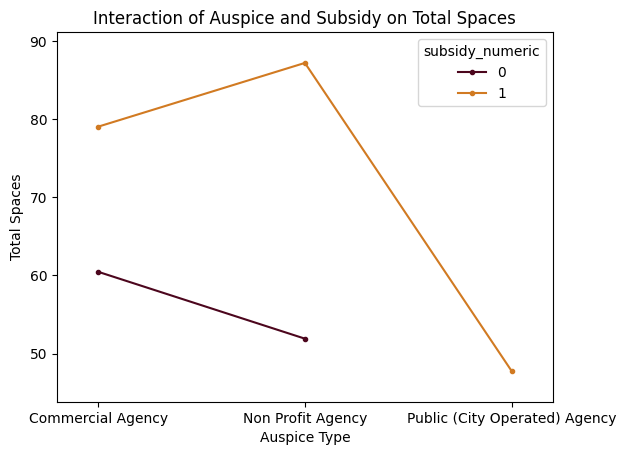

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot



# interaction_plot
df['subsidy_numeric'] = df['subsidy'].map({'Y': 1, 'N': 0})


fig = interaction_plot(x=df['AUSPICE'], trace=df['subsidy_numeric'], response=df['TOTSPACE'],
                       colors=['#4c061d', '#d17a22'])
plt.title('Interaction of Auspice and Subsidy on Total Spaces')
plt.xlabel('Auspice Type')
plt.ylabel('Total Spaces')
plt.show()


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
      group1                  group2            meandiff p-adj   lower    upper   reject
----------------------------------------------------------------------------------------
Commercial Agency             Non Profit Agency  17.1194    0.0   9.7037  24.5351   True
Commercial Agency Public (City Operated) Agency -17.2152 0.0779 -35.8832   1.4528  False
Non Profit Agency Public (City Operated) Agency -34.3346    0.0 -52.4448 -16.2244   True
----------------------------------------------------------------------------------------


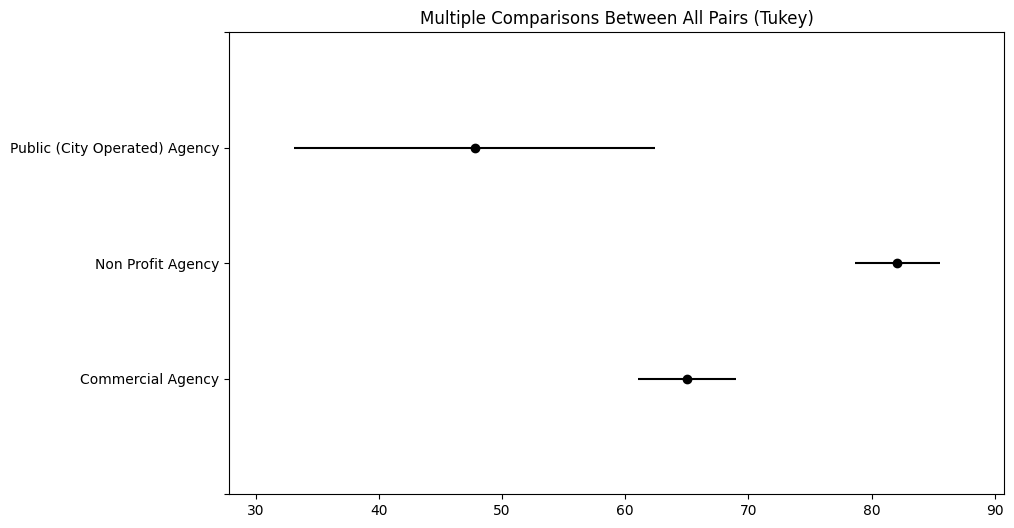

In [4]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform Tukey's HSD post-hoc test
tukey_results = pairwise_tukeyhsd(endog=df['TOTSPACE'],     # Data
                                  groups=df['AUSPICE'],     # Groups
                                  alpha=0.05)               # Significance level

# Print the results
print(tukey_results)

# You can also plot the results
tukey_results.plot_simultaneous()
plt.show()
